In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Importing dataset

In [2]:
df=pd.read_csv('datasets_4458_8204_winequality-red.csv')


In [3]:
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.shape

(1599, 12)

# 2. Data quality check

In [5]:
df1=df[df!=0].dropna()   # dropping rows with atleast one 0 values in a row.
df1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [6]:
df1.shape

(1467, 12)

# 3. Exploratory data analysis

In [7]:
a=df1.columns.tolist()

In [8]:
a

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [9]:
k=[]
for i in range(0,12):
    k.append(df1[a[i]].tolist())
    

In [10]:
len(k)

12

## 3.a - Univariate Analysis - 

### (i) Histograms

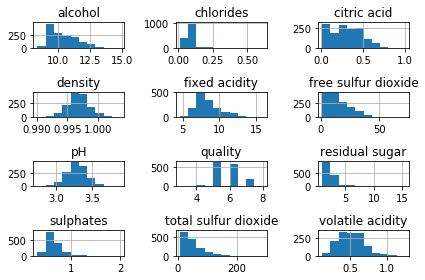

In [11]:
df1.hist()
plt.tight_layout()

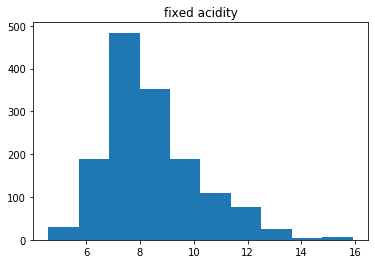

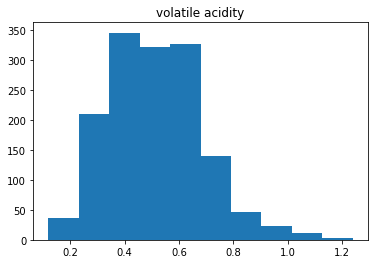

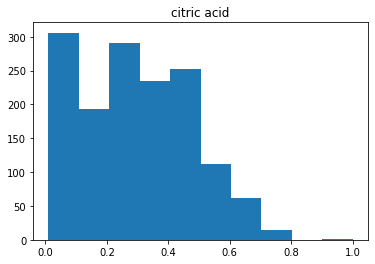

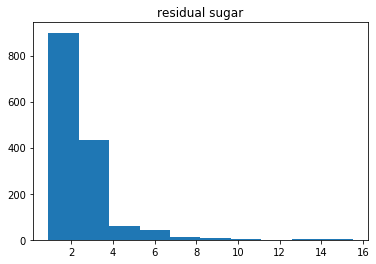

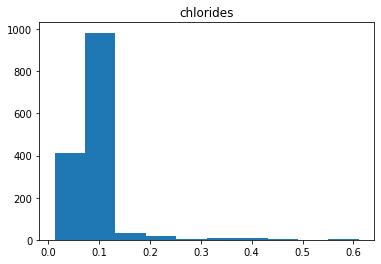

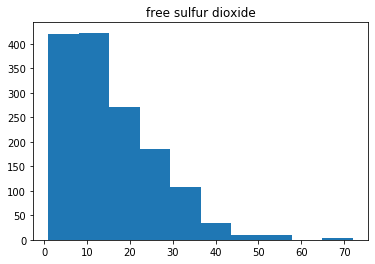

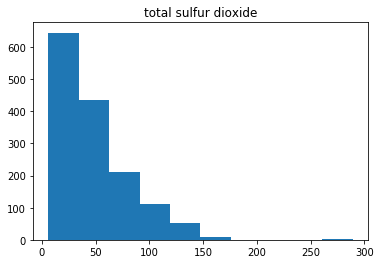

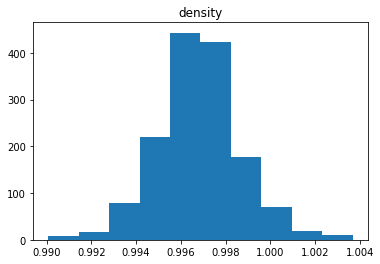

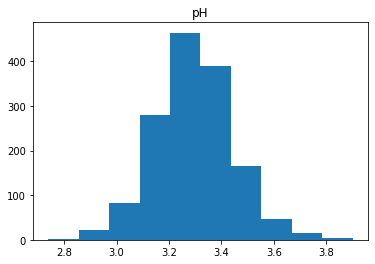

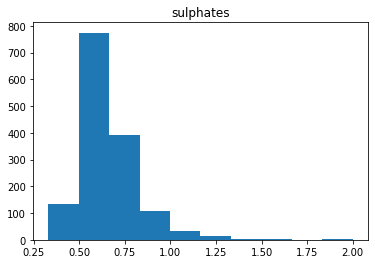

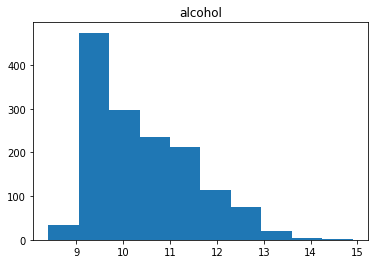

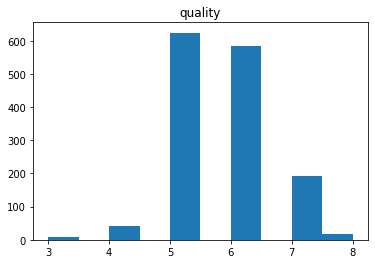

In [12]:
for i in range(0,12):
    plt.hist(k[i])
    plt.title(a[i])
    plt.show()

### (ii) boxplots

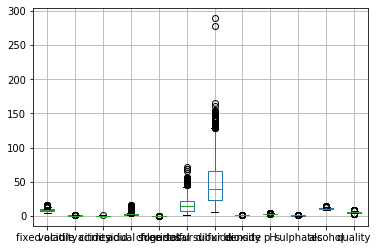

In [13]:
df1.boxplot()

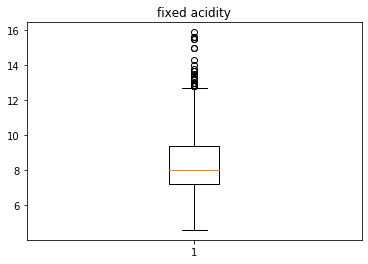

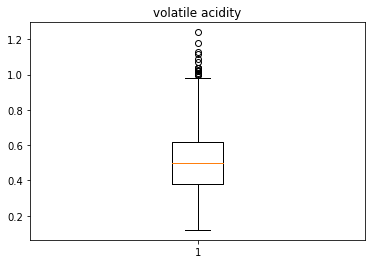

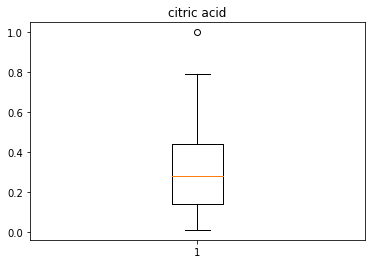

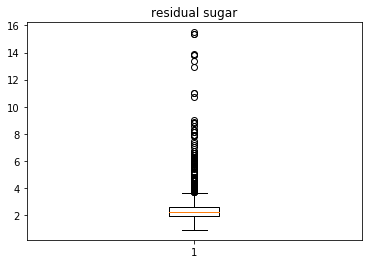

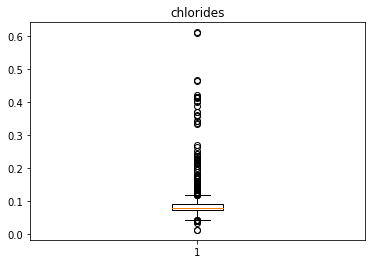

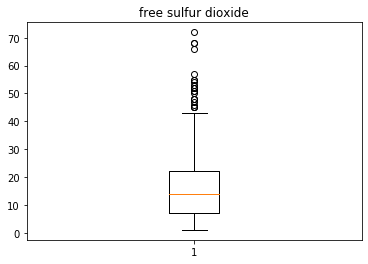

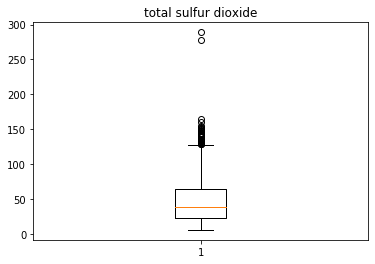

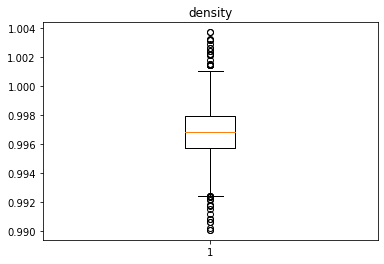

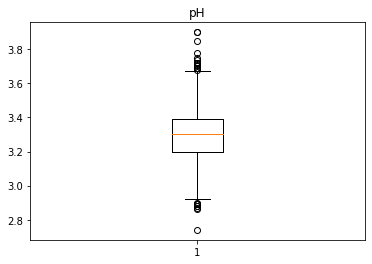

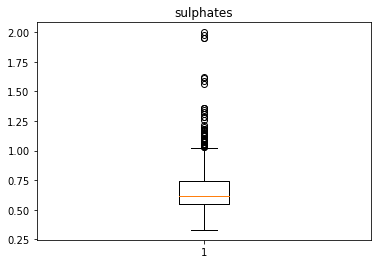

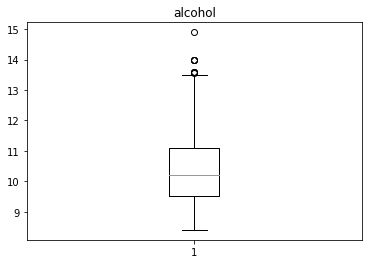

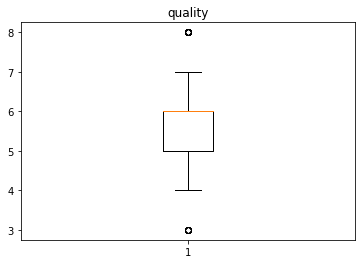

<Figure size 432x288 with 0 Axes>

In [14]:
for i in range(0,12):
    plt.boxplot(k[i])
    plt.title(a[i])
    plt.show()
    plt.clf()

## 3.b - Bivariate analysis - 

### (i) Scatter plots

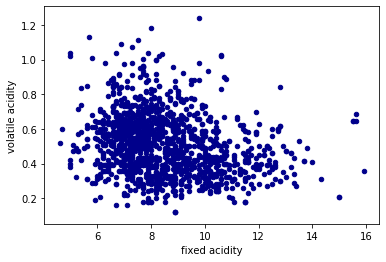

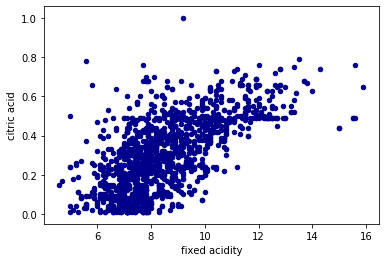

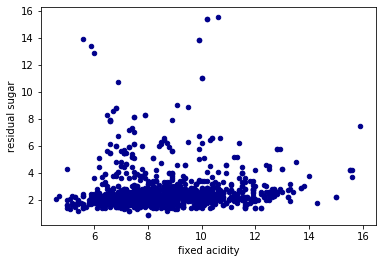

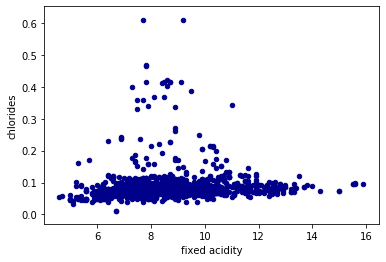

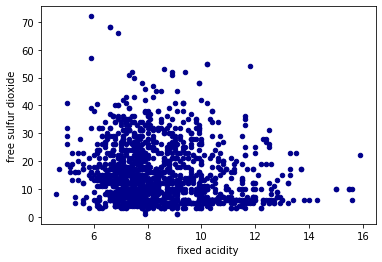

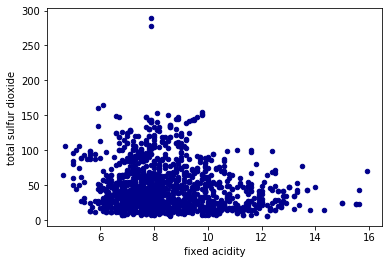

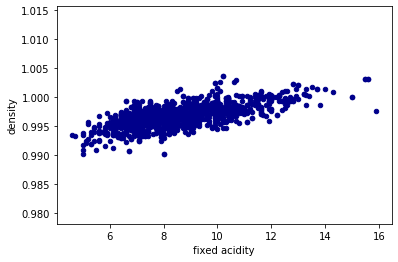

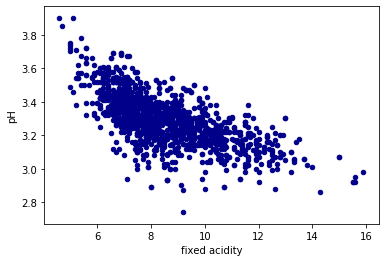

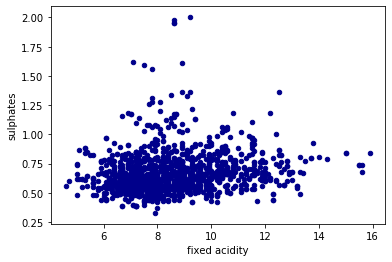

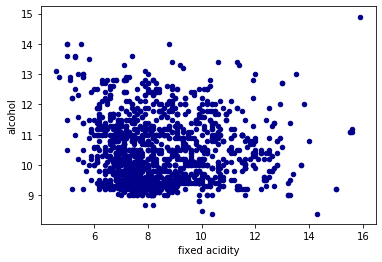

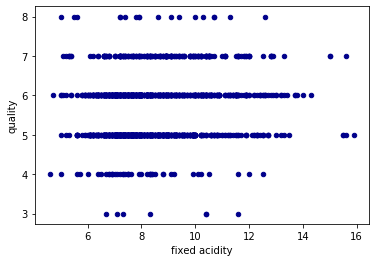

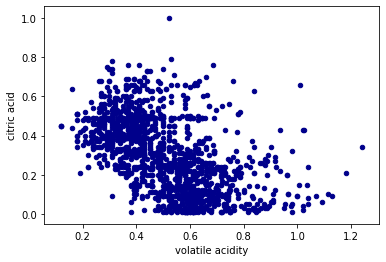

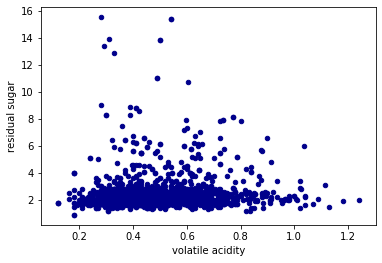

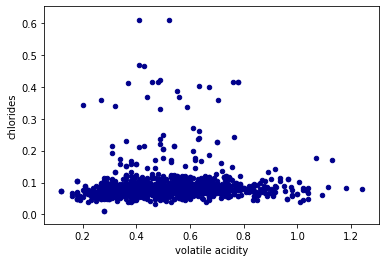

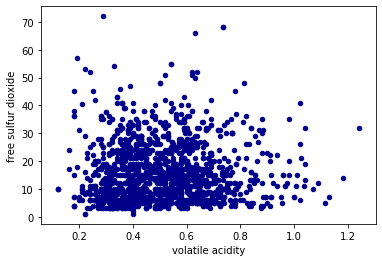

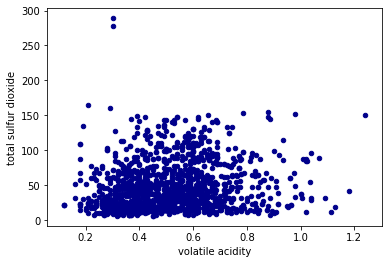

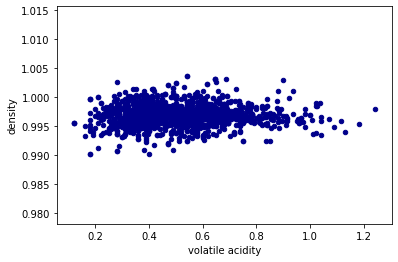

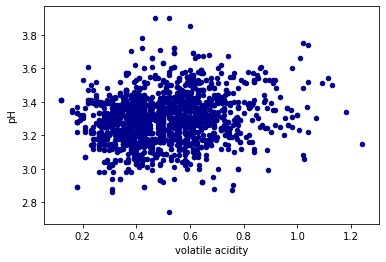

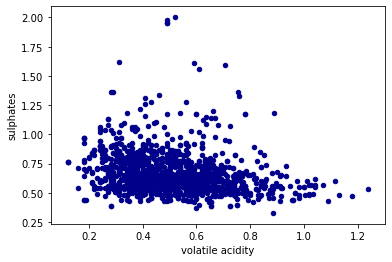

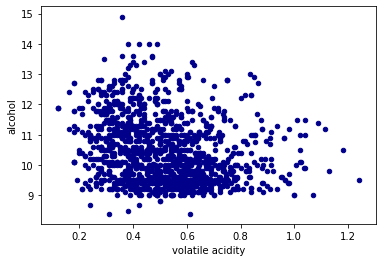

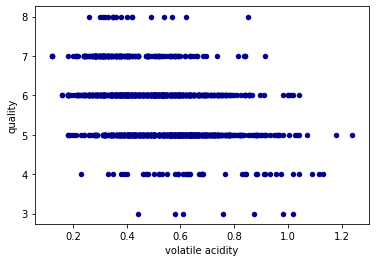

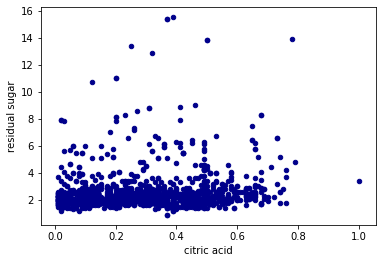

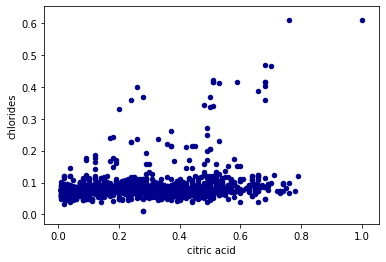

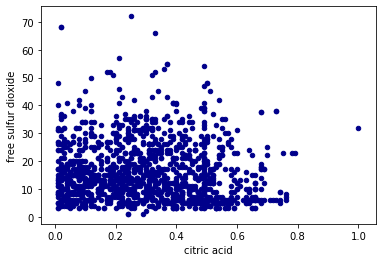

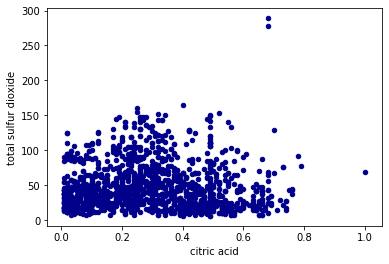

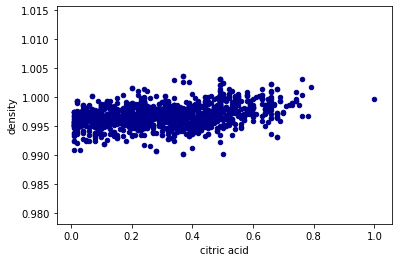

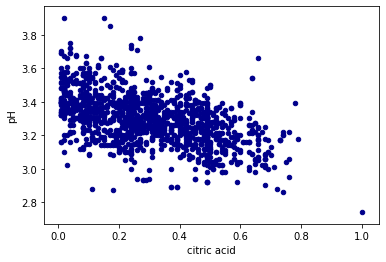

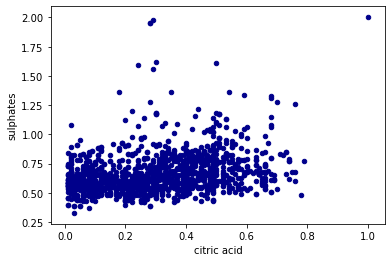

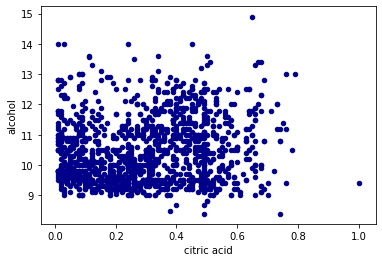

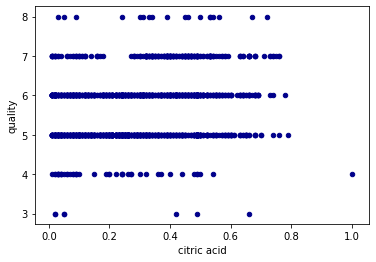

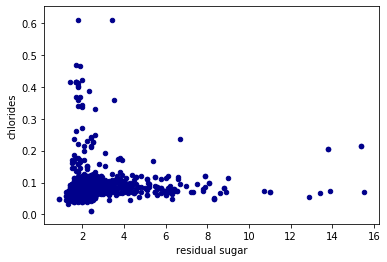

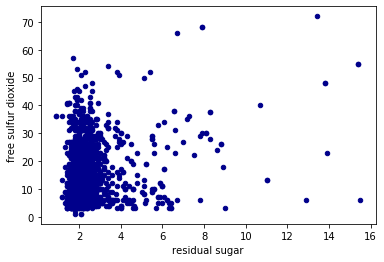

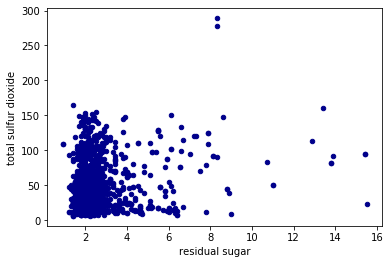

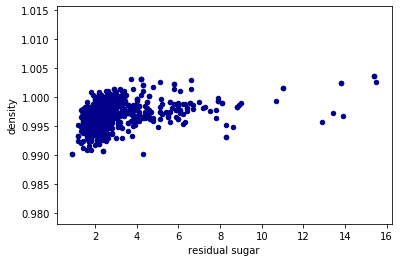

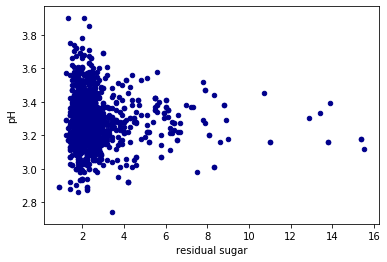

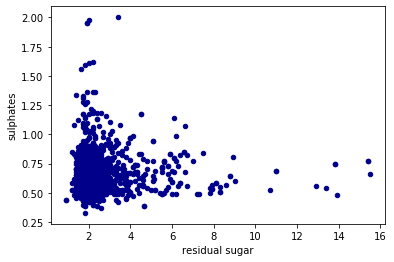

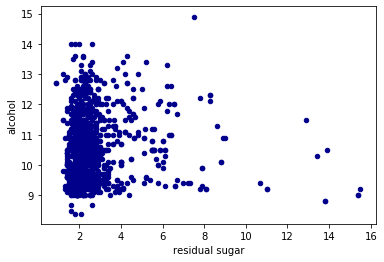

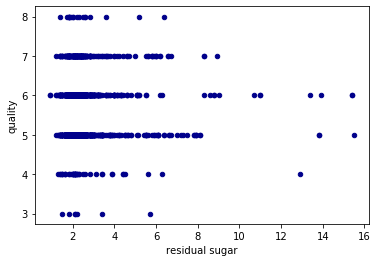

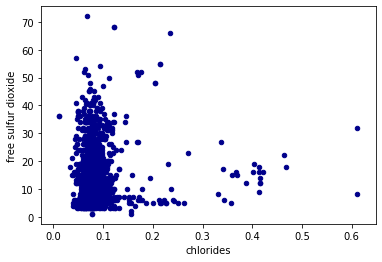

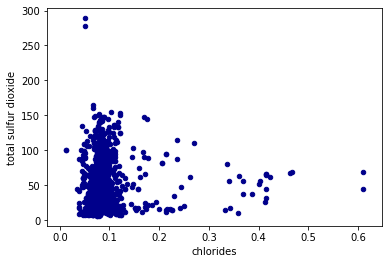

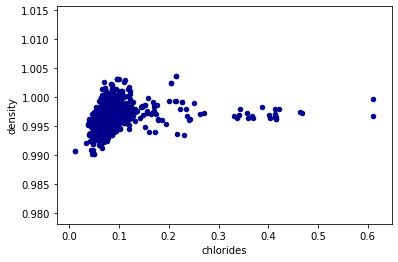

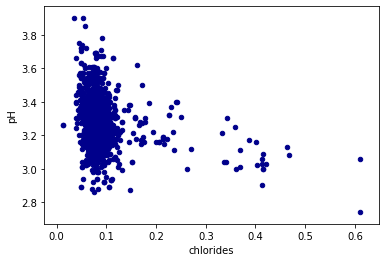

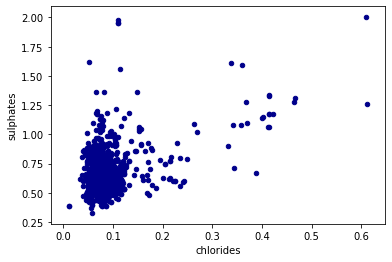

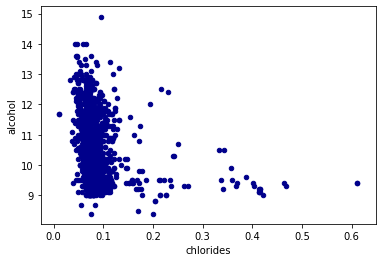

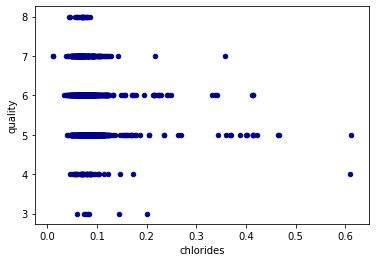

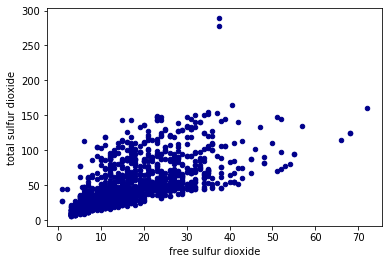

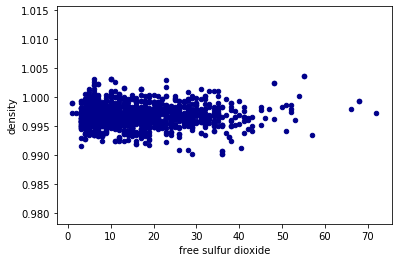

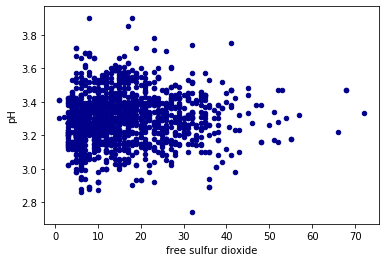

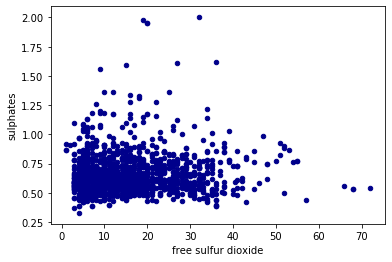

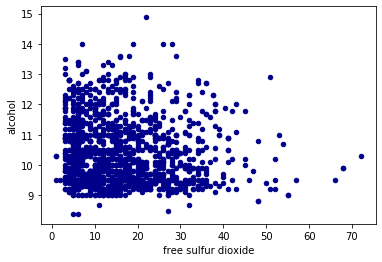

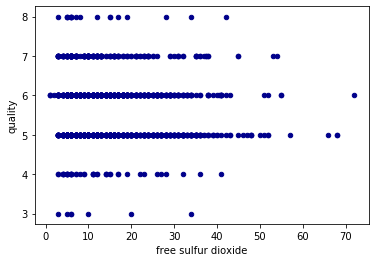

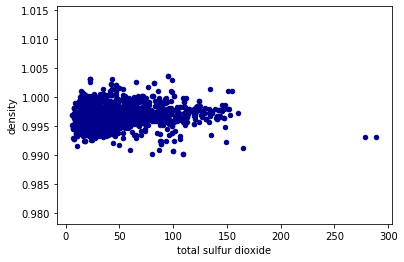

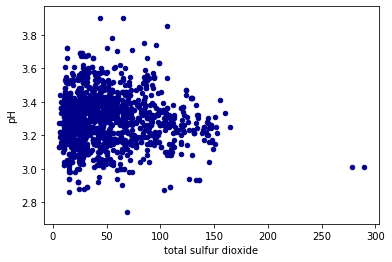

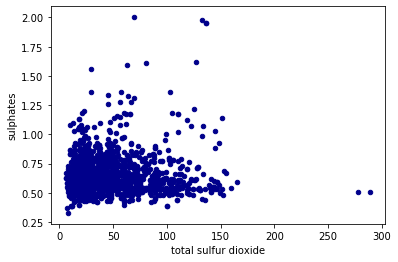

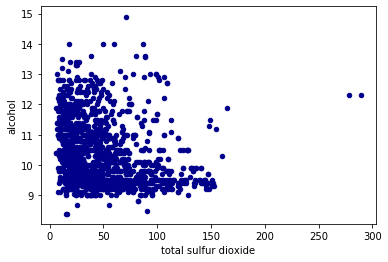

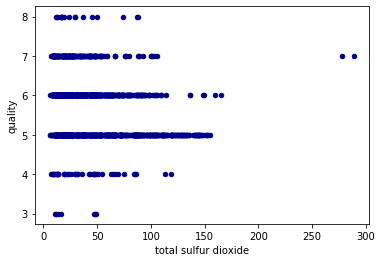

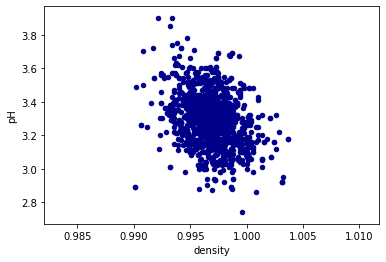

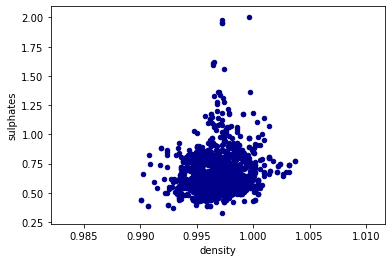

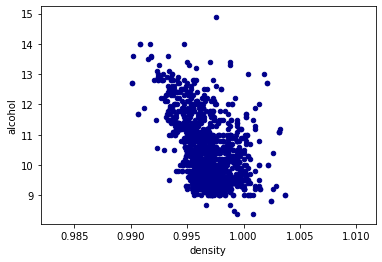

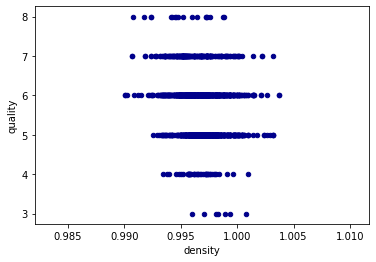

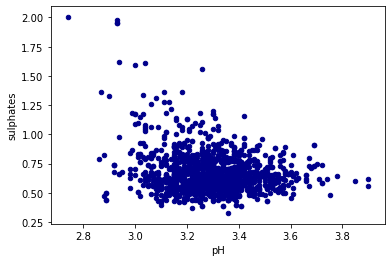

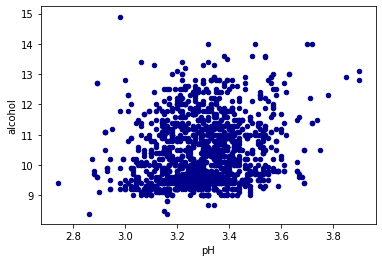

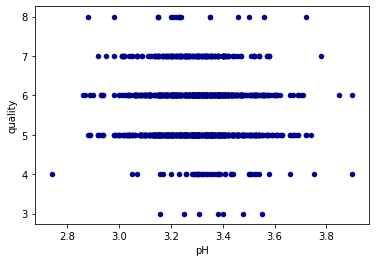

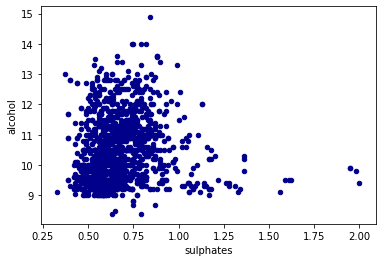

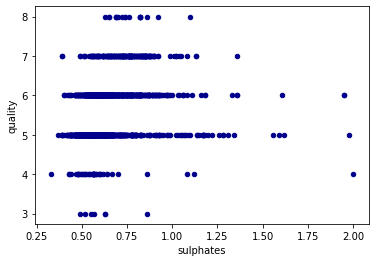

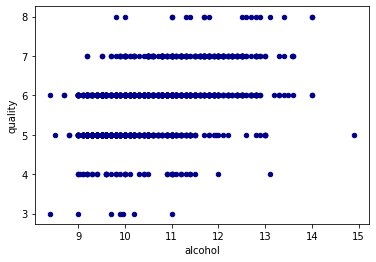

In [15]:
for i in range(0,12):
    for j in range(i+1,12):
        df1.plot.scatter(x=a[i], y=a[j], c='DarkBlue')
        plt.show()

# 4. Modelling

In [16]:
from sklearn.neighbors import KNeighborsClassifier
y = df1["quality"].values
X = df1.drop(["quality"],axis=1).values

## 4.a - Split the dataset using “train-test-split” function.

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=40,stratify=y)
# test_size and random_state are chosen after analysis of wide range of cases (along with range of neighbor values) for better accuracy.
# Not included the testing process here as it takes long time to load

## 4.b - Apply KNN classification on “quality” column of the dataset. Select the appropriate features

In [18]:
n_neighbors=[]
for i in range(2,50):
    n_neighbors.append(i)
score = []
for a in n_neighbors:
    knn=KNeighborsClassifier(n_neighbors=a)
    knn.fit(X_train,y_train)
    score.append(knn.score(X_test,y_test))
m = score.index(max(score))
n = n_neighbors[m]
n

4

In [19]:
knn=KNeighborsClassifier(n_neighbors=n)

In [20]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [21]:
knn.score(X_test,y_test)

0.6054421768707483

In [22]:
knn.score(X_train,y_train)

0.6760443307757886

### Predict on test set

In [23]:
y_pred=knn.predict(X_test)
y_pred

array([5, 5, 5, 6, 5, 6, 5, 5, 6, 5, 5, 5, 6, 7, 6, 5, 6, 5, 5, 6, 6, 5,
       7, 5, 5, 6, 6, 5, 5, 5, 5, 5, 5, 6, 6, 6, 5, 6, 5, 5, 7, 6, 5, 6,
       7, 5, 5, 6, 5, 5, 5, 6, 5, 5, 6, 6, 5, 5, 5, 5, 5, 5, 5, 7, 5, 5,
       5, 6, 6, 6, 6, 6, 6, 6, 5, 5, 8, 6, 5, 5, 5, 5, 6, 5, 5, 5, 6, 6,
       5, 7, 5, 6, 5, 5, 5, 5, 6, 5, 5, 5, 6, 5, 5, 6, 5, 5, 6, 7, 7, 5,
       7, 6, 6, 6, 6, 5, 7, 6, 5, 7, 7, 5, 5, 6, 5, 5, 5, 6, 5, 6, 6, 5,
       5, 5, 6, 5, 6, 6, 5, 7, 6, 6, 6, 6, 5, 5, 5, 5, 6, 5, 6, 6, 5, 6,
       5, 6, 5, 6, 5, 5, 6, 5, 6, 5, 6, 5, 5, 5, 5, 5, 6, 5, 6, 6, 6, 5,
       5, 6, 5, 6, 5, 5, 7, 5, 5, 6, 5, 6, 5, 6, 7, 7, 6, 5, 6, 7, 6, 6,
       5, 6, 5, 5, 5, 5, 6, 5, 6, 6, 5, 6, 5, 6, 5, 6, 6, 5, 7, 7, 5, 6,
       5, 7, 5, 5, 6, 4, 5, 5, 6, 5, 6, 6, 5, 5, 6, 6, 5, 5, 6, 6, 7, 6,
       5, 5, 6, 7, 6, 7, 5, 5, 6, 6, 6, 6, 5, 5, 5, 5, 5, 6, 7, 6, 5, 5,
       6, 5, 6, 5, 5, 5, 6, 6, 5, 6, 5, 5, 6, 5, 5, 5, 6, 6, 6, 6, 5, 5,
       5, 7, 6, 5, 5, 6, 5, 6], dtype=int64)

### Find out accuracy

In [24]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [25]:
confusion_matrix(y_test,y_pred)

array([[ 0,  0,  1,  0,  0,  0],
       [ 0,  0,  7,  2,  0,  0],
       [ 0,  0, 97, 23,  5,  0],
       [ 0,  0, 41, 69,  7,  0],
       [ 0,  1,  6, 18, 12,  1],
       [ 0,  0,  2,  1,  1,  0]], dtype=int64)

In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         9
           5       0.63      0.78      0.70       125
           6       0.61      0.59      0.60       117
           7       0.48      0.32      0.38        38
           8       0.00      0.00      0.00         4

    accuracy                           0.61       294
   macro avg       0.29      0.28      0.28       294
weighted avg       0.57      0.61      0.58       294



C:\Users\V ABHIGNA\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


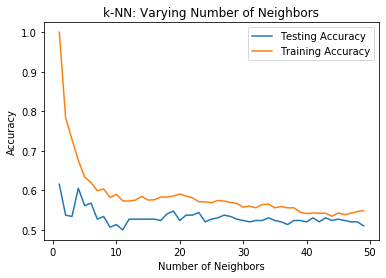

In [27]:
neighbors = np.arange(1, 50)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

## 4.c - Apply logistic Regression on “quality” column of the dataset. Select the appropriate features

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
logreg=LogisticRegression()

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=32,stratify=y)
# test_size and random_state are chosen after testing across wide range of cases for better accuracy. 
# Not included that testing procedure here as it takes long time to load.

In [31]:
logreg.fit(X_train,y_train)

C:\Users\V ABHIGNA\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
logreg.score(X_train,y_train)

0.577152600170503

In [33]:
logreg.score(X_test,y_test)

0.6224489795918368

### Predict on test set

In [34]:
y_pred=logreg.predict(X_test)
y_pred

array([5, 6, 6, 6, 6, 5, 5, 6, 5, 5, 5, 6, 6, 5, 6, 5, 6, 5, 5, 6, 5, 6,
       5, 5, 5, 6, 6, 5, 5, 6, 5, 5, 6, 5, 6, 5, 6, 6, 6, 6, 5, 5, 5, 5,
       6, 6, 5, 5, 5, 5, 6, 6, 5, 6, 5, 5, 5, 6, 6, 6, 6, 6, 5, 5, 5, 6,
       6, 5, 6, 5, 5, 5, 5, 5, 5, 6, 5, 5, 6, 5, 5, 6, 7, 6, 5, 5, 6, 5,
       5, 6, 5, 6, 6, 6, 6, 6, 5, 6, 5, 5, 6, 6, 5, 6, 5, 6, 6, 6, 5, 5,
       6, 6, 5, 6, 5, 5, 6, 6, 5, 5, 5, 6, 6, 6, 6, 5, 6, 5, 5, 5, 6, 5,
       5, 6, 5, 6, 6, 5, 5, 5, 6, 5, 6, 6, 5, 5, 6, 5, 5, 6, 5, 6, 5, 6,
       5, 6, 5, 6, 6, 6, 5, 5, 5, 6, 6, 5, 5, 6, 5, 6, 5, 5, 6, 6, 6, 5,
       6, 5, 5, 6, 6, 5, 6, 6, 6, 5, 5, 6, 6, 5, 5, 6, 5, 5, 5, 6, 5, 5,
       6, 5, 6, 5, 6, 6, 6, 6, 5, 5, 5, 5, 5, 6, 5, 6, 7, 6, 5, 6, 5, 6,
       6, 5, 5, 6, 5, 5, 6, 5, 6, 6, 6, 6, 6, 6, 6, 5, 6, 5, 6, 6, 5, 6,
       5, 6, 5, 6, 5, 6, 6, 5, 5, 6, 6, 5, 6, 6, 5, 6, 6, 5, 6, 5, 5, 6,
       6, 5, 5, 5, 5, 5, 6, 5, 6, 6, 5, 6, 6, 6, 5, 6, 6, 6, 6, 6, 5, 5,
       6, 6, 6, 6, 5, 5, 5, 6], dtype=int64)

### Find out the accuracy

In [35]:
confusion_matrix(y_test,y_pred)

array([[  0,   0,   1,   0,   0,   0],
       [  0,   0,   4,   5,   0,   0],
       [  0,   0, 102,  23,   0,   0],
       [  0,   0,  36,  80,   1,   0],
       [  0,   0,   2,  35,   1,   0],
       [  0,   0,   0,   4,   0,   0]], dtype=int64)

In [36]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         9
           5       0.70      0.82      0.76       125
           6       0.54      0.68      0.61       117
           7       0.50      0.03      0.05        38
           8       0.00      0.00      0.00         4

    accuracy                           0.62       294
   macro avg       0.29      0.25      0.24       294
weighted avg       0.58      0.62      0.57       294



C:\Users\V ABHIGNA\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


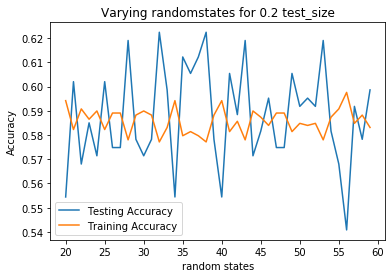

In [37]:
rand=range(20,60)
train_accuracy = np.empty(len(rand))
test_accuracy = np.empty(len(rand))

for i, k in enumerate(rand):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=k,stratify=y)
    train_accuracy[i] = logreg.score(X_train,y_train)
    test_accuracy[i] = logreg.score(X_test,y_test)

plt.title('Varying randomstates for 0.2 test_size')
plt.plot(rand, test_accuracy, label = 'Testing Accuracy')
plt.plot(rand, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('random states')
plt.ylabel('Accuracy')
plt.show()